<a href="https://colab.research.google.com/github/PsorTheDoctor/OpenAI-gym/blob/master/mountain_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

In [0]:
!pip install pyvirtualdisplay
!pip install piglet

In [5]:
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
# Ten kod tworzy wirtualny ekran, aby toczyć grę na nim
# Jeśli uruchamiasz lokalnie, zignoruj to
import os
if type(os.environ.get('DISPLAY')) is not str or len(os.environ.get('DISPLAY')) == 0:
  !bash ../xvfb start
  %env DISPLAY=:1

In [7]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40)
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [0]:
"""
Użyteczne funkcje umożliwiające nagranie środowiska gym i wyświetlenie go
Aby zezwolić na wideo wystarczy "env = wrap_env"
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
      </video>'''.format(encoded.decode('ascii'))))
  else:
    print('Could not find video')

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

## MountainCar
### Losowa akcja

In [39]:
import gym 
env = gym.make('MountainCar-v0')
env = wrap_env(env)

# Eksploracja środowiska MountainCar
# plt.imshow(env.render('rgb_array'))
print('Observation space: ', env.observation_space)
print('Action space: ', env.action_space)

# Podejmuje losowe akcje i wyświetla wideo
# W MountainCar, observation stanowią dwie liczby:
# pozycję pojazdu i prędkość
observation = env.reset()

print('Initial observation code: ', observation)

while True:
  env.render()

  action = env.action_space.sample()  # podujmuje losową akcję
  observation, reward, done, info = env.step(action)
  print(reward)

  if done:
    break;

env.close()
show_video()

Observation space:  Box(2,)
Action space:  Discrete(3)
Initial observation code:  [-0.5465262  0.       ]
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0

### Przypisana akcja

In [43]:
import gym 
env = gym.make('MountainCar-v0')
env = wrap_env(env)

# Eksploracja środowiska MountainCar
# plt.imshow(env.render('rgb_array'))
print('Observation space: ', env.observation_space)
print('Action space: ', env.action_space)

Observation space:  Box(2,)
Action space:  Discrete(3)


Initial observation code:  [-0.51629519  0.        ]
Taking action 2 (right)
New observation code:  [-0.51534996  0.00094523]
Reward:  -1.0
Is game over?  False


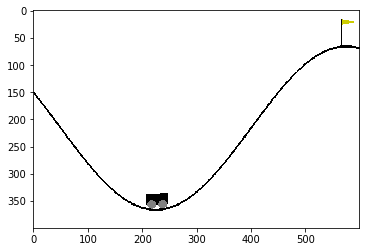

In [41]:
# Trochę eksploracji
obs = env.reset()
print('Initial observation code: ', obs)
print('Taking action 2 (right)')
new_obs, reward, is_done, _ = env.step(2)

print('New observation code: ', new_obs)
print('Reward: ', reward)
print('Is game over? ', is_done)

# Jak widać, pojazd poruszył się trochę w prawo (ok. 0.0005)
plt.imshow(env.render('rgb_array'))

### Wyświetlenie wideo

In [44]:
import gym 
env = gym.make('MountainCar-v0')
env = wrap_env(env)

# Eksploracja środowiska MountainCar
# plt.imshow(env.render('rgb_array'))
print('Observation space: ', env.observation_space)
print('Action space: ', env.action_space)

# Porusza się w prawo i wyświetla wideo
# W MountainCar, observation stanowią dwie liczby:
# pozycję pojazdu i prędkość
observation = env.reset()

print('Initial observation code: ', observation)

for _ in range(1000):
  env.render()

  print('Taking action 2 (right)')
  action = 2
  observation, reward, done, info = env.step(action)
  print(reward)

  if done:
    break;

env.close()
show_video()

Observation space:  Box(2,)
Action space:  Discrete(3)
Initial observation code:  [-0.48201871  0.        ]
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right)
-1.0
Taking action 2 (right

### MountainCar z heurystyką

In [0]:
import gym
from gym.envs.classic_control.mountain_car import MountainCarEnv

In [46]:
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(MountainCarEnv(), max_episode_steps=TIME_LIMIT + 1)
env = wrap_env(env)

obs = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

def policy(t):
  if t > 50 and t < 100:
    return actions['left']
  else:
    return actions['right']


for t in range(TIME_LIMIT):
  obs, r, done, _ = env.step(policy(t))

  if done:
    print("Well done!")
    break;

env.close()
show_video()

Well done!
